In [76]:
ACCESS_TOKEN="vk1.a.oDlee1W-R_UBOUubfZN1q4IXJSrXkaMemIjbo-uZyWmJ3rcD0TyiRrhc8OOMzHc5osp7UDCj4RSXRT45oTSqbhDC1I8KVhe4n3Mw8qZbhFWzGjcaWWyBtLS6Ie9LgF7MlinmLUMR4rhY-QcPdSFFS4TJa3PG0AGw2MnXWX_9dgrUiMySdbEcHyhWxleUVnYq4pj9_gHOu4g9LCFpvQJtww"
VERSION = 5.199

In [58]:
%%bash
pip install requests
pip install networkx
pip install pandas
pip install numpy
pip install matplotlib
pip install scikit-learn

In [ ]:
from collections import defaultdict
import requests

In [ ]:
all_users = {}

friends = defaultdict(set)

def get_friends_by_id(user_id):
  resp = requests.get("https://api.vk.com/method/friends.get", params={'access_token': ACCESS_TOKEN,
        'user_id': user_id,
        'v': VERSION,
        'fields': 'bdate,city,timezone,sex,status,last_name'})

  if resp.status_code != 200:
    print(f"Request failed with status code: {resp.status_code}, user_id: {user_id}")
    return

  resp = resp.json()

  if resp.get('error'):
    print(f"Request failed with error: {resp.get('error')}, user_id: {user_id}")
    return

  for item in resp.get('response', {}).get('items', []):
    all_users[item['id']] = {
      'id': item.get('id'),
      'birthdate' : item.get('bdate'),
      'city' : item.get('city', {}).get('title'),
      'sex' : item.get('sex'),
      'name' : item.get('first_name', '') + ' ' + item.get('last_name', ''),
    }
    friends[user_id].add(item["id"])
    friends[item["id"]].add(user_id)

# Мои друзья
get_friends_by_id(316931542)

# Получаем друзей для друзей
all_friends = list(all_users.keys()).copy()

count = 0
for friend in all_friends:
  get_friends_by_id(friend)
  count += 1
  if count % 1000 == 0:
    print(str(count) + ' пользователей обработано')

Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '5927666'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}, user_id: 5927666
Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '29284565'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}, user_id: 29284565
Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '94121124'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'v

In [91]:
import json

In [92]:
def save_to_json(filename, user_data, sets_data):
    sets_for_json = {key: list(value) for key, value in sets_data.items()}
    
    data = {
        "user_map": user_data,
        "number_sets": sets_for_json
    }
    
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)

def load_from_json(filename: str):
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    user_map = {int(key): value for key, value in data["user_map"].items()}
    number_sets = {key: set(value) for key, value in data["number_sets"].items()}
    
    return user_map, number_sets

save_to_json("dump.json", all_users, friends)

In [ ]:
# Если нужно загрузить данные
all_users, friends = load_from_json("dump.json")

In [62]:
all_friends = defaultdict(set)

def verify_friends(user_id):
  resp = requests.get("https://api.vk.com/method/friends.get", params={'access_token': ACCESS_TOKEN,
        'user_id': user_id,
        'v': VERSION})

  if resp.status_code != 200:
    print(f"Request failed with status code: {resp.status_code}, user_id: {user_id}")
    return
  resp = resp.json()
  if resp.get('error'):
    #print(f"Request failed with error: {resp.get('error')}, user_id: {user_id}")
    return

  for item in resp.get('response', {}).get('items', []):
    if all_users.get(item):
      friends[user_id].add(item)
      friends[item].add(user_id)

    all_friends[user_id].add(item)
    all_friends[item].add(user_id)

count = 0
for user in all_users.keys():
  verify_friends(user)
  count += 1
  if count % 1000 == 0:
    print(str(count) + ' пользователей обработано')

1000 пользователей обработано
2000 пользователей обработано
3000 пользователей обработано
4000 пользователей обработано
5000 пользователей обработано
6000 пользователей обработано
7000 пользователей обработано
8000 пользователей обработано
9000 пользователей обработано
10000 пользователей обработано
11000 пользователей обработано
12000 пользователей обработано
13000 пользователей обработано
14000 пользователей обработано
15000 пользователей обработано
16000 пользователей обработано
17000 пользователей обработано
18000 пользователей обработано
19000 пользователей обработано
20000 пользователей обработано
21000 пользователей обработано
22000 пользователей обработано
23000 пользователей обработано
24000 пользователей обработано
25000 пользователей обработано


In [63]:
print('Количество вершин ' + str(len(all_users)))

vert_count = 0
for _, s in friends.items():
    vert_count += len(s)
print('Количество ребер ' + str(vert_count / 2))

Количество вершин 25267
Количество ребер 129132.0


# 2 пункт, расчет центральности

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
for user_id, friends_set in friends.items():
    G.add_node(user_id)

    for friend_id in friends_set:
        G.add_edge(user_id, friend_id)
    
user_ids = [316931542]

print("Расчет центральности по посредничеству")
btw_centrality = nx.betweenness_centrality(G, k=min(1000, G.number_of_nodes()))
    

print("Расчет центральности по близости")
cls_centrality = nx.closeness_centrality(G)
    
print("Расчет центральности по собственному вектору")
eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    
results = {}
for member_id in user_ids:
    if member_id in G:
        results[member_id] = {
            'betweenness': btw_centrality.get(member_id, 0),
            'closeness': cls_centrality.get(member_id, 0),
            'eigenvector': eig_centrality.get(member_id, 0)
        }
    else:
        results[member_id] = {
            'betweenness': 0,
            'closeness': 0,
            'eigenvector': 0
        }

Расчет центральности по посредничеству
Расчет центральности по близости
Расчет центральности по собственному вектору


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_list = []
for user_id, metrics in results.items():
    row = {'user_id': user_id}
    row.update(metrics) 
    data_list.append(row)

results_df = pd.DataFrame(data_list)

results_df

,user_id,betweenness,closeness,eigenvector
0,316931542,0.329379,0.500942,0.003346


# 3 пункт, модель предсказания дружбы

In [82]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import math

In [80]:
friends_pairs = set()
count = 0
for u, friends_set in friends.items():
    for v in friends_set:
        if v in all_users: 
            pair = tuple(sorted([u, v]))
            friends_pairs.add(pair)
    count += 1
    if count % 1000 == 0:
        print(str(count) + ' пользователей обработано')

users_list = list(all_users.keys())

not_friends_pairs = set()
count = 0
while len(not_friends_pairs) < len(friends_pairs):
    u, v = np.random.choice(users_list, 2, replace=False)
    pair = tuple(sorted([u, v]))
    
    if (pair not in not_friends_pairs and v not in friends.get(u, set()) and u not in friends.get(v, set())):
        not_friends_pairs.add(pair)

        count += 1
        if count % 1000 == 0:
            print(str(count) + ' пользователей обработано')

friends_pairs = list(friends_pairs)
not_friends_pairs = list(not_friends_pairs)

print(f'{len(friends_pairs)} получено пар друзей')
print(f'{len(friends_pairs)} получено пар не друзей')

1000 пользователей обработано
2000 пользователей обработано
3000 пользователей обработано
4000 пользователей обработано
5000 пользователей обработано
6000 пользователей обработано
7000 пользователей обработано
8000 пользователей обработано
9000 пользователей обработано
10000 пользователей обработано
11000 пользователей обработано
12000 пользователей обработано
13000 пользователей обработано
14000 пользователей обработано
15000 пользователей обработано
16000 пользователей обработано
17000 пользователей обработано
18000 пользователей обработано
19000 пользователей обработано
20000 пользователей обработано
21000 пользователей обработано
22000 пользователей обработано
23000 пользователей обработано
24000 пользователей обработано
1000 пользователей обработано
2000 пользователей обработано
3000 пользователей обработано
4000 пользователей обработано
5000 пользователей обработано
6000 пользователей обработано
7000 пользователей обработано
8000 пользователей обработано
9000 пользователей обрабо

In [102]:
all_pairs = friends_pairs + not_friends_pairs
results = [1] * len(friends_pairs) + [0] * len(not_friends_pairs)


all_features = []
feature_names = [
    'equal_sex', 'equal_city',
    'first_friends', 'second_friends'
    'common_friends', 'common_friends_per_friends'
]

for u, v in all_pairs:
    features = []
    
    friends_u = friends.get(u, set())
    friends_v = friends.get(v, set())

    if all_users[u].get('sex'):
        if all_users[v].get('sex'):
            if all_users[u].get('sex') == all_users[v].get('sex'):
                features.append(1)
            else:
                features.append(0)
        else:
            features.append(-1)
    else:
        features.append(-1)

    if all_users[u].get('city'):
        if all_users[v].get('city'):
            if all_users[u].get('city') == all_users[v].get('city'):
                features.append(1)
            else:
                features.append(0)
        else:
            features.append(-1)
    else:
        features.append(-1)
    
    features.append(len(friends_u))
    features.append(len(friends_v))

    common_neighbors = len(friends_u & friends_v)
    features.append(common_neighbors)
    
    union_neighbors = len(friends_u | friends_v)
    if union_neighbors > 0:
        features.append(common_neighbors / union_neighbors)
    else:
        features.append(0)

    all_features.append(features)

X = np.array(all_features)
y = np.array(results)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")


Обучающая выборка: 38834 примеров
Тестовая выборка: 16644 примеров


In [103]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [104]:

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8322
           1       0.99      1.00      1.00      8322

    accuracy                           1.00     16644
   macro avg       1.00      1.00      1.00     16644
weighted avg       1.00      1.00      1.00     16644

ROC-AUC: 0.9989


In [88]:
%%bash
pip install seaborn

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(70.72222222222221, 0.5, 'Истинный класс')

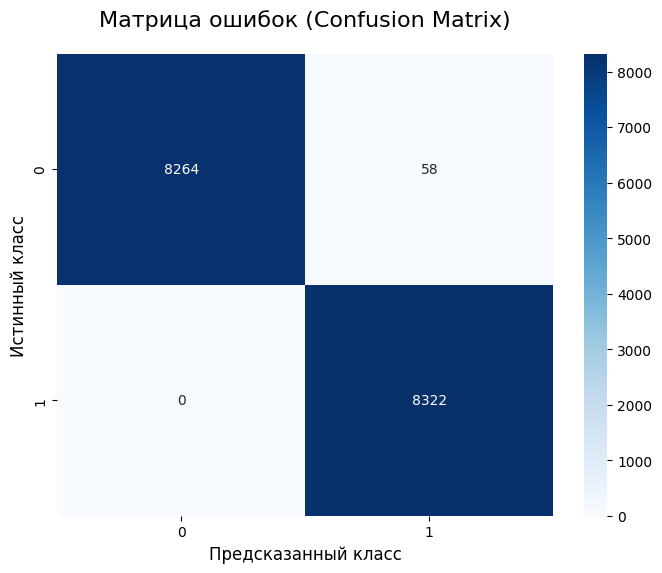

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8322
           1       0.99      1.00      1.00      8322

    accuracy                           1.00     16644
   macro avg       1.00      1.00      1.00     16644
weighted avg       1.00      1.00      1.00     16644

ROC-AUC: 0.9989


Text(70.72222222222221, 0.5, 'Истинный класс')

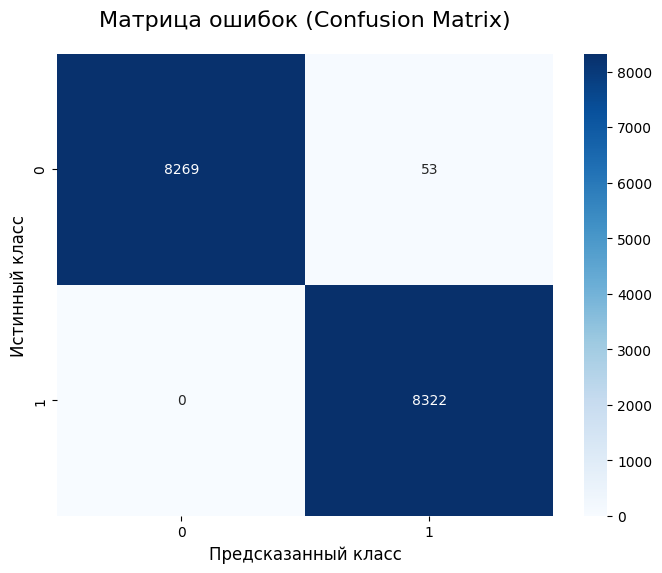

In [96]:
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8322
           1       0.99      0.98      0.99      8322

    accuracy                           0.99     16644
   macro avg       0.99      0.99      0.99     16644
weighted avg       0.99      0.99      0.99     16644

ROC-AUC: 0.9988


/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

Text(70.72222222222221, 0.5, 'Истинный класс')

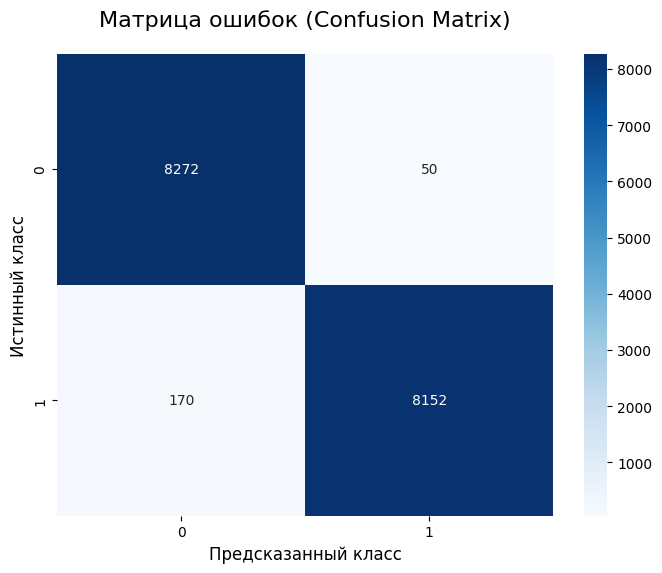

In [97]:
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)